In [1]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('/content/electricity_consumption_data.csv', sep=';')

In [3]:

# Convert Date_Time to useful time features
df['Date'] = pd.to_datetime(df['Date_Time'], format='%Y-%m-%d %H:%M:%S')
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday


In [4]:
# Extract target (y) and features (X)
y = df['Consumption_kW']
# Prepare the features (X) after adding time components
X = df[['Hour', 'Day', 'Month', 'Weekday']]

In [5]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Optional: Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Build the linear regression model using TensorFlow
# Updated model with more complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.9081 - val_loss: 0.2163
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2033 - val_loss: 0.1785
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1710 - val_loss: 0.1647
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1599 - val_loss: 0.1648
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1504 - val_loss: 0.1628
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1564 - val_loss: 0.1554
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1496 - val_loss: 0.3465
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1761 - val_loss: 0.1552
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1525 - val_loss: 0.1524
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1496 - val_loss: 0.1539


In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-Squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
print(y_pred)
print(y_test)

[[2.5429146]
 [2.4723275]
 [2.496723 ]
 ...
 [2.4135263]
 [2.501479 ]
 [2.464051 ]]
11356    2.84
26543    3.27
2445     2.48
14649    2.11
32699    2.82
         ... 
15276    0.91
3023     2.40
32096    4.08
9929     2.20
9284     1.76
Name: Consumption_kW, Length: 7009, dtype: float64


In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the trained model for future use
model.save('linear_regression_model.h5')

Mean Squared Error: 0.15165617762532524
R-squared: 0.8270825876811325


In [11]:
# Extracting the loss values from the history
train_loss = history.history['loss']          # Training loss (MSE)
val_loss = history.history['val_loss']        # Validation loss (MSE)




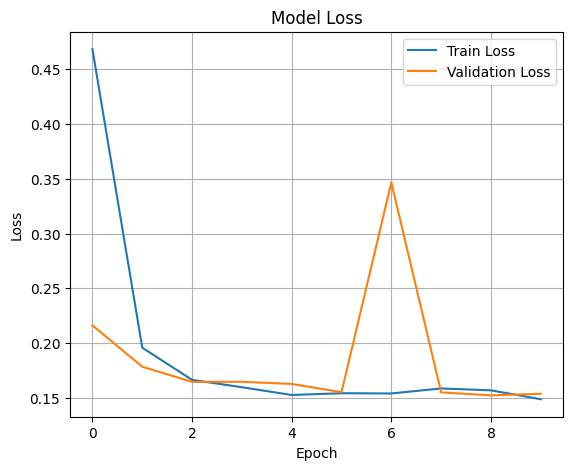

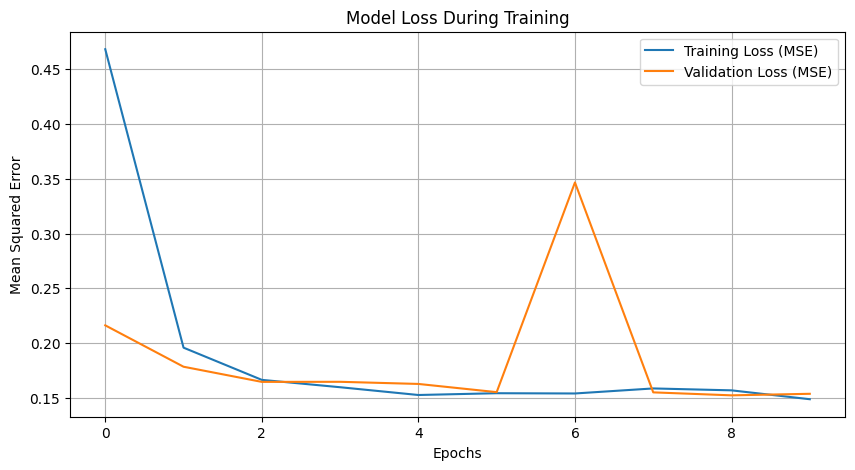

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting the loss values
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Show the plots
plt.tight_layout()
plt.show()
